In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt    
from math import pi
import scipy.stats

# 50 hilos  
df_1 = pd.read_csv("./resultados_esc1.jtl") 
# 100 hilos
df_2 = pd.read_csv("./resultados_esc2.jtl") 
# 250 hilos
df_3 = pd.read_csv("./resultados_esc3.jtl") 

stationaryPeriod = 240

startTime = 10*1000
endTime = stationaryPeriod*1000

firstTimestamp = df_1.iloc[0]['timeStamp']
df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed']) > (firstTimestamp + startTime)]
df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_2.iloc[0]['timeStamp']
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed']) > (firstTimestamp + startTime)]
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_3.iloc[0]['timeStamp']
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed']) > (firstTimestamp + startTime)]
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed']) <= (firstTimestamp + startTime + endTime)]

elapsedData = df_1['elapsed']
df_1_case_1 = df_1[df_1['label'] == 'Caso prueba 1']['elapsed']
df_1_case_2 = df_1[df_1['label'] == 'Caso prueba 2']['elapsed']

df_2_case_1 = df_2[df_2['label'] == 'Caso prueba 1']['elapsed']
df_2_case_2 = df_2[df_2['label'] == 'Caso prueba 2']['elapsed']

df_3_case_1 = df_3[df_3['label'] == 'Caso prueba 1']['elapsed']
df_3_case_2 = df_3[df_3['label'] == 'Caso prueba 2']['elapsed']


In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [3]:
def getRow(data, hilos, size):
    minResponseTime = data.min()
    maxResponseTime = data.max()
    meanResponseTime = data.mean()
    medianResponseTime = data.median()
    modeResponseTime = data.mode()
    totalTime = data.sum()

    std = data.std(ddof=0)

    rango = data.max() - data.min()
    iqr = data.quantile(0.75) - data.quantile(0.25)

    numRequest = data.size
    throughput = (numRequest/stationaryPeriod)
    potencia = (throughput/meanResponseTime)
    confidence_interval = mean_confidence_interval(data)
    
    return [hilos, size, minResponseTime, maxResponseTime, meanResponseTime, medianResponseTime, std, numRequest, throughput, potencia, rango, iqr, confidence_interval];


In [4]:
data = [
    getRow(df_1_case_1, 50, 'small'), getRow(df_1_case_2, 50, 'big'),
    getRow(df_2_case_1, 100, 'small'), getRow(df_2_case_2, 100, 'big'),
    getRow(df_3_case_1, 250, 'small'), getRow(df_3_case_2, 250, 'big'),
];

columns = ['N. hilos', 'Tam. imagen', 'Min', 'Max', 'Media', 'Mediana', 'Desv. estandar', 'N. Peticiones', 'Throughput', 'Potencia', 'Rango', 'IQR', 'Mean Confidence Interval']
keys = ['Img. pequeña 50 hilos', 'Img. grande 50 hilos', 'Img. pequeña 100 hilos', 'Img. grande 100 hilos', 'Img. pequeña 250 hilos', 'Img. grande 250 hilos']

df = pd.DataFrame(data, columns = columns, index = keys) 

df 

N. hilos Tam. imagen    Min    Max         Media  \
Img. pequeña 50 hilos         50       small   1947  12625   4387.972405   
Img. grande 50 hilos          50         big   5481  25058  11353.445623   
Img. pequeña 100 hilos       100       small   3429  16967   8286.101010   
Img. grande 100 hilos        100         big   8563  52524  22121.522310   
Img. pequeña 250 hilos       250       small   6869  50625  23998.267429   
Img. grande 250 hilos        250         big  18088  92433  46412.431058   

                        Mediana  Desv. estandar  N. Peticiones  Throughput  \
Img. pequeña 50 hilos    4168.0     1330.274011            761    3.170833   
Img. grande 50 hilos    10911.0     2744.828074            754    3.141667   
Img. pequeña 100 hilos   8039.0     2286.027993            792    3.300000   
Img. grande 100 hilos   21564.0     4570.294594            762    3.175000   
Img. pequeña 250 hilos  24837.0     6296.126910            875    3.645833   
Img. grande 250 hilos   45410.0     8979.715859            747    3.112500   

                        Potencia  Rango       IQR  \
Img. pequeña 50 hilos   0.000723  10678   1623.00   
Img. grande 50 hilos    0.000277  19577   3468.50   
Img. pequeña 100 hilos  0.000398  13538   3028.75   
Img. grande 100 hilos   0.000144  43961   5593.00   
Img. pequeña 250 hilos  0.000152  43756   7272.00   
Img. grande 250 hilos   0.000067  74345  11723.50   

                                        Mean Confidence Interval  
Img. pequeña 50 hilos     (4293.245230005004, 4482.699579456231)  
Img. grande 50 hilos    (11157.080491891535, 11549.810754792816)  
Img. pequeña 100 hilos      (8126.547475642821, 8445.6545445592)  
Img. grande 100 hilos   (21796.291836952896, 22446.752782469677)  
Img. pequeña 250 hilos   (23580.275701610593, 24416.25915553226)  
Img. grande 250 hilos   (45767.005059026604, 47057.857056100576)

In [5]:
keys = ['Img. pequeña 50 hilos', 'Img. grande con 50 hilos', 'Img. pequeña 100 hilos', 'Img. grande con 100 hilos', 'Img. pequeña 250 hilos', 'Img. grande con 250 hilos']
allDf = pd.concat([
    df_1_case_1, df_1_case_2,
    df_2_case_1, df_2_case_2,
    df_3_case_1, df_3_case_2], axis=1, keys=keys)
bplot = allDf.boxplot(
    column=keys,
    labels=keys,
    vert=True,
    figsize=(16,14)
)
bplot.set_ylabel('ms')
bplot.set_title('Tiempos de espera')
plt.show()


Text(0, 0.5, 'ms')

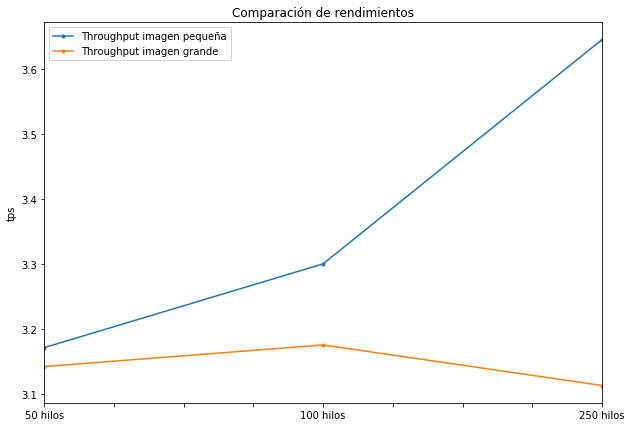

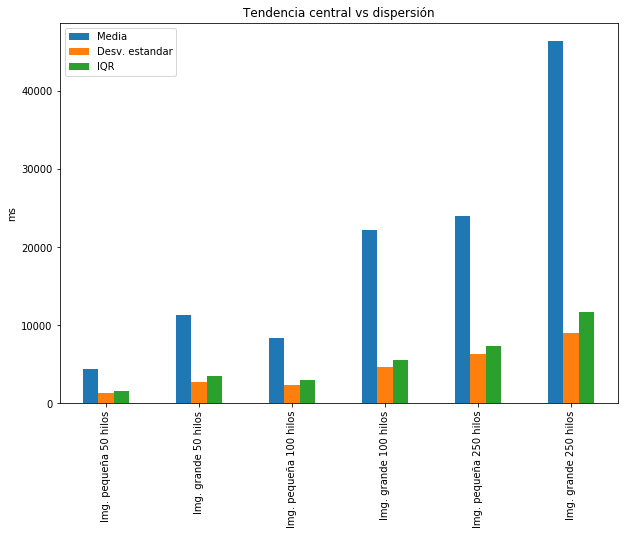

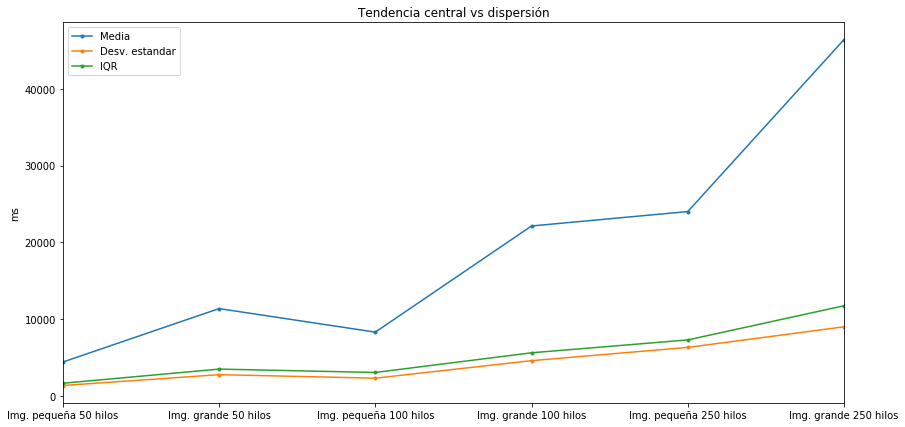

In [6]:
dfSmall = df[df['Tam. imagen'] == 'small'].reset_index()['Throughput'];
dfBig = df[df['Tam. imagen'] == 'big'].reset_index()['Throughput'];
dfLines = pd.concat([dfSmall, dfBig], axis=1)
dfLines.index = ['50 hilos', '100 hilos', '250 hilos']
dfLines.columns = ['Throughput imagen pequeña', 'Throughput imagen grande']
ax = dfLines.plot(title = 'Comparación de rendimientos', style = '.-', figsize=(10, 7))
ax.set_ylabel("tps")

columns = ['Media', 'Desv. estandar', 'IQR']
dfBar = df[columns]
ax = dfBar.plot(title = 'Tendencia central vs dispersión', kind = 'bar', figsize=(10, 7))
ax.set_ylabel("ms")
ax = dfBar.plot(title = 'Tendencia central vs dispersión', style = '.-', figsize=(14, 7))
ax.set_ylabel("ms")




In [7]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [8]:
df_perf_1 = pd.read_csv("./log_perfmon_1.csv") 
df_perf_2 = pd.read_csv("./log_perfmon_2.csv") 
df_perf_3 = pd.read_csv("./log_perfmon_3.csv") 

firstTimestamp = df_perf_1.iloc[0]['timeStamp']
df_perf_1 = df_perf_1[(df_perf_1['timeStamp']) > (firstTimestamp + startTime)]
df_perf_1 = df_perf_1[(df_perf_1['timeStamp']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_perf_2.iloc[0]['timeStamp']
df_perf_2 = df_perf_2[(df_perf_2['timeStamp']) > (firstTimestamp + startTime)]
df_perf_2 = df_perf_2[(df_perf_2['timeStamp']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_perf_3.iloc[0]['timeStamp']
df_perf_3 = df_perf_3[(df_perf_3['timeStamp']) > (firstTimestamp + startTime)]
df_perf_3 = df_perf_3[(df_perf_3['timeStamp']) <= (firstTimestamp + startTime + endTime)]


df_disk_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(100)
df_tcp_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed'].div(100)
df_mem_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed'].div(100)

df_disk_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(100)
df_tcp_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed'].div(100)
df_mem_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed'].div(100)

df_disk_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(100)
df_tcp_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed'].div(100)
df_mem_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed'].div(100)



In [9]:
def getPerfmonRow(data, escenario, usuarios):
    disk = data[data['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
    tcp = data[data['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
    memory = data[data['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
    cpu = data[data['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']
    
    meanDisk =disk.mean()
    meanTcp = tcp.mean() / 1000
    meanMemory = memory.mean() / 1000
    meanCpu = cpu.mean() / 100
    
    return [escenario, usuarios, meanCpu, meanMemory, meanTcp, meanDisk];

In [10]:
# initialize list of lists 
data = [
    getPerfmonRow(df_perf_1, 1, 50),
    getPerfmonRow(df_perf_2, 2, 100),
    getPerfmonRow(df_perf_3, 3, 250),
];

columns = ['Escenario', 'Usuarios', 'CPU', 'Memory', 'Tcp', 'Disk']
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = columns, index = ['50 hilos', '100 hilos', '250 hilos']) 
  
# print dataframe. 
df

Escenario  Usuarios       CPU     Memory         Tcp        Disk
50 hilos           1        50  8.505125  27.209142   51.345833    0.350000
100 hilos          2       100  9.595146  29.299921  100.887029  281.389121
250 hilos          3       250  8.674708  31.119083  249.291667    0.000000

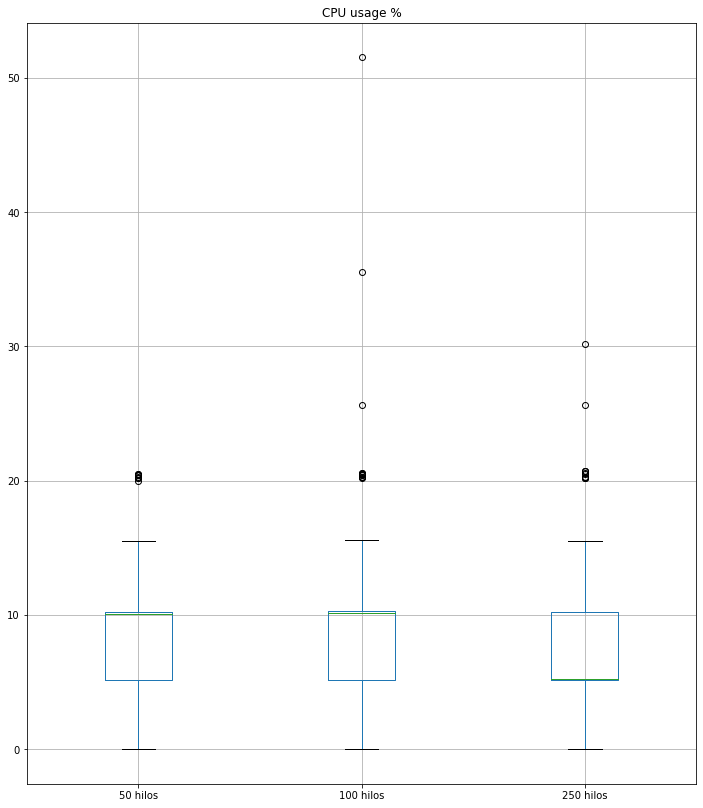

In [11]:
allDf = pd.concat([df_cpu_1, df_cpu_2, df_cpu_3], axis=1, keys=['50 hilos', '100 hilos', '250 hilos'])
bplot = allDf.boxplot(
    column=['50 hilos', '100 hilos', '250 hilos'],
    labels=['50 hilos', '100 hilos', '250 hilos'],
    vert=True,
    figsize=(12,14)
)
plt.title('CPU usage %')

plt.show()

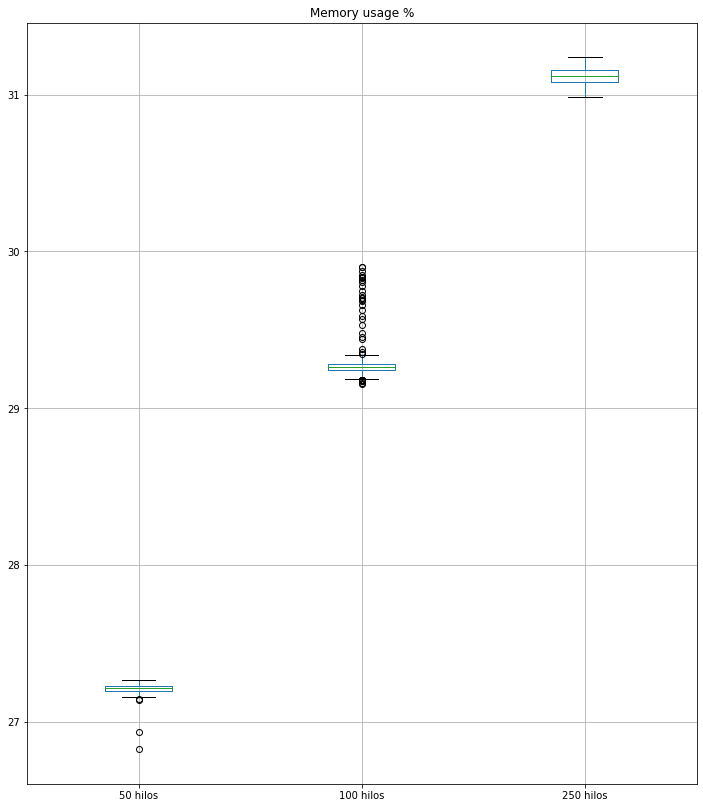

In [12]:
allDf = pd.concat([df_mem_1, df_mem_2, df_mem_3], axis=1, keys=['50 hilos', '100 hilos', '250 hilos'])
bplot = allDf.boxplot(
    column=['50 hilos', '100 hilos', '250 hilos'],
    labels=['50 hilos', '100 hilos', '250 hilos'],
    vert=True,
    figsize=(12,14)
)
plt.title('Memory usage %')

plt.show()

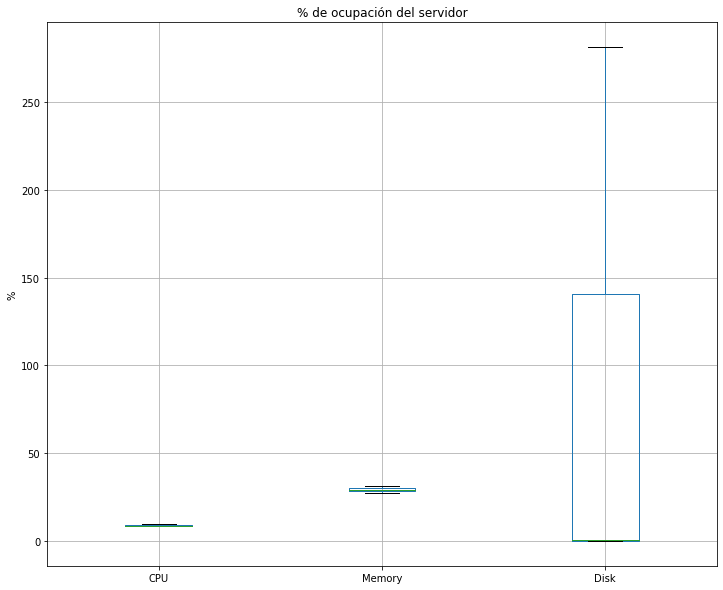

Text(0, 0.5, '%')

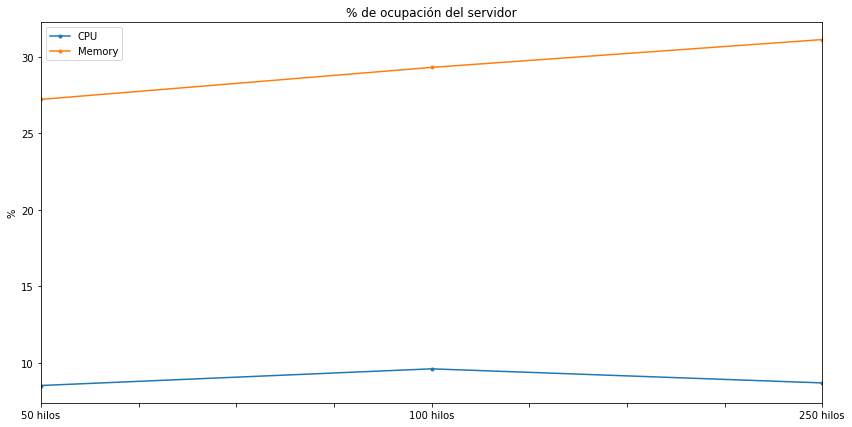

In [13]:
bplot = df.boxplot(
    column=['CPU', 'Memory', 'Disk'],
    labels=['CPU', 'Memory', 'Disk'],
    vert=True,   #vertical box alignment
    figsize=(12,10)
)
bplot.set_ylabel('%')
plt.title('% de ocupación del servidor')
plt.show()

columns = ['CPU', 'Memory']
dfLines = df[columns]
ax = dfLines.plot(title = '% de ocupación del servidor', style = '.-', figsize=(14, 7))
ax.set_ylabel("%")